## Historical Volatility
La volatilidad es sinónimo de la desviación estándar anualizada de los precios (disperción). Ojo, la volatilidad solo mide variación pero no dirección, una acción con una volatilidad diaria del 3%, no quiere decir necesariamente que aumentó (o disminuyó) en un 3%, también puede haber ocurrido que subió un 2% hasta la media sesión pero en lo que quedaba del día bajó un 1% (este ejemplo puede ser llevado a un horizonte anual).

A continuación se analizará la intensidad de el cambio de los precios de cierre durante los útltimos 10 años del SPY.

In [15]:
# paquetes indispensables
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# obteniendo la data del SPY
data = pdr.get_data_yahoo('SPY', period='10y')

# obteniendo los retornos o cambios porcentuales diarios
returns = (data['Adj Close'].pct_change()).dropna()
returns 

[*********************100%***********************]  1 of 1 completed


Date
2013-03-26 00:00:00-04:00    0.008003
2013-03-27 00:00:00-04:00    0.000000
2013-03-28 00:00:00-04:00    0.003073
2013-04-01 00:00:00-04:00   -0.003958
2013-04-02 00:00:00-04:00    0.004935
                               ...   
2023-03-17 00:00:00-04:00   -0.011693
2023-03-20 00:00:00-04:00    0.009616
2023-03-21 00:00:00-04:00    0.013131
2023-03-22 00:00:00-04:00   -0.017046
2023-03-23 00:00:00-04:00    0.012573
Name: Adj Close, Length: 2517, dtype: float64

In [17]:
# vista rápida de la principal info estadística de los retornos diarios
returns.describe(percentiles = [0.75, 0.90])

count    2517.000000
mean        0.000509
std         0.011027
min        -0.109424
50%         0.000630
75%         0.005626
90%         0.011656
max         0.090603
Name: Adj Close, dtype: float64

Considerando los 10 años de data, el promedio de la variación diaria es de 0.0509%, la desviación estándar en este caso es de 1.1%. ¿Que quiere decir esto? que en el 68% de los casos (primera desviación estándar) el retorno diario puede fluctuar de la media un 1.1% hacia arriba o hacia abajo.

In [18]:
# la volatilidad corresponde a la desviación estándar anualizada, cada año cuenta con 252 trading days
daily_std = returns.std()
annualized_std =  daily_std* np.sqrt(252)
annualized_std

0.17504444579466422

#### Rolling Volatility

In [19]:
# sabiendo que la volatilidad no es estátita y que va cambiando en cada sesión de trading
volatility = returns.rolling(window=20).std()*np.sqrt(252)
volatility.tail()

Date
2023-03-17 00:00:00-04:00    0.177413
2023-03-20 00:00:00-04:00    0.182145
2023-03-21 00:00:00-04:00    0.175094
2023-03-22 00:00:00-04:00    0.185520
2023-03-23 00:00:00-04:00    0.190293
Name: Adj Close, dtype: float64

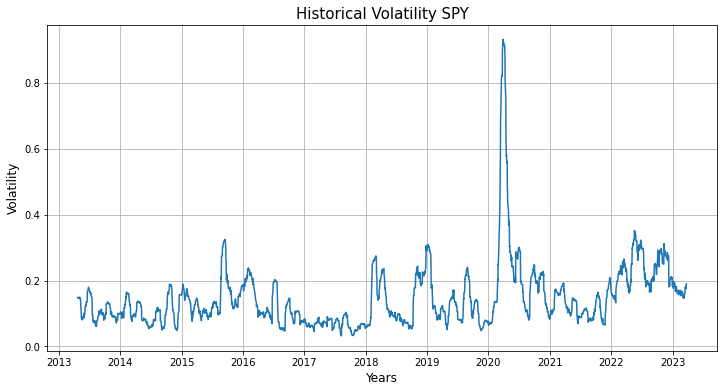

In [20]:
# plot
plt.figure(figsize=(12, 6)) # tamaño del gráfico
plt.plot(volatility)
plt.title('Historical Volatility SPY', fontsize=15) # título
plt.ylabel('Volatility', fontsize=12) # etiqueta eje y
plt.xlabel('Years', fontsize=12) # etiqueta eje x
plt.grid() # cuadrículas
plt.show()